# 개념 정리
- 문자열 처리
    - 기본 조작
    - 정규 표현식
- lambda/map/apply
- 함수 작성
- iterrows()

In [62]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# sns.get_dataset_names()

# 문제

In [64]:
# 미국 택시 요금 데이터
taxi = sns.load_dataset('taxis')
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [65]:
# 문제 1
# 기본 조작방식을 통해 승차시간(pickup)과 하차시간(dropoff)을 년/월/일 시간:분으로 형식을 바꿔주세요 예) 2019/03/23 20:21


In [66]:
taxi['pickup'] = taxi['pickup'].str.replace('-','/').apply(lambda x : x[:-3])
taxi['dropoff'] = taxi['dropoff'].str.replace('-','/').apply(lambda x: x[:-3])
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019/03/23 20:21,2019/03/23 20:27,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019/03/04 16:11,2019/03/04 16:19,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019/03/27 17:53,2019/03/27 18:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019/03/10 01:23,2019/03/10 01:49,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019/03/30 13:27,2019/03/30 13:37,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [67]:
# 문제 2
# 1번 문제를 정규표현식을 사용하여 동일한 결과가 나타나도록 코드를 구성하세요


In [79]:
taxi = sns.load_dataset('taxis')

def change_time(x):
    result1 = re.sub('-','/', x)
    result2 = re.sub('[0-9]{2}:[0-9]{2}:[0-9]{2}', lambda x : x.group()[:-3], result1)
    return result2


taxi['pickup'] = taxi['pickup'].apply(change_time)
taxi['dropoff'] = taxi['dropoff'].apply(change_time)

In [80]:
# 문제 3
# 2번 문제의 결과를 기준으로, 정규표현식을 이용하여 연도, 월, 일, 시, 분을 원하는 대로 추출할 수 있는 함수를 만드세요
# tip : def extract_number(x, option) <- parameter 2개

In [83]:
#2019/03/30 13:27
def extract_number(x, option):

    # 그룹 딕셔너리
    group_dic = {'year':'\\1',
           'month':'\\2',
           'day':'\\3',
           'hour':'\\4',
           'minute':'\\5'}

    if option == 'year':
        return re.sub('([\d]+)/([\d]+)/([\d]+) ([\d]+):([\d]+)', group_dic['year'], x)

    elif option == 'month':
        return re.sub('([\d]+)/([\d]+)/([\d]+) ([\d]+):([\d]+)', group_dic['month'], x)

    elif option == 'day':
        return re.sub('([\d]+)/([\d]+)/([\d]+) ([\d]+):([\d]+)', group_dic['day'], x)

    elif option == 'hour':
        return re.sub('([\d]+)/([\d]+)/([\d]+) ([\d]+):([\d]+)', group_dic['hour'], x)

    else:
        return re.sub('([\d]+)/([\d]+)/([\d]+) ([\d]+):([\d]+)', group_dic['minute'], x)

In [71]:
# 문제 4
# 3번 문제에서 만든 함수를 이용하여 하차했을 때 승차시점의 월(month)가 다른 행을 찾아주세요


In [84]:
taxi['dropoff_month'] = taxi['dropoff'].apply(extract_number, option = 'month').astype(int)
taxi['dropoff_day'] = taxi['dropoff'].apply(extract_number, option = 'day').astype(int)
taxi['dropoff_hour'] = taxi['dropoff'].apply(extract_number, option = 'hour').astype(int)
taxi['dropoff_minute'] = taxi['dropoff'].apply(extract_number, option = 'minute').astype(int)

taxi['pickup_month'] = taxi['pickup'].apply(extract_number, option = 'month').astype(int)
taxi['pickup_day'] = taxi['pickup'].apply(extract_number, option = 'day').astype(int)
taxi['pickup_hour'] = taxi['pickup'].apply(extract_number, option = 'hour').astype(int)
taxi['pickup_minute'] = taxi['pickup'].apply(extract_number, option = 'minute').astype(int)

taxi[taxi.dropoff_month != taxi.pickup_month]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_borough,dropoff_borough,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,pickup_month,pickup_day,pickup_hour,pickup_minute
591,2019/03/31 23:43,2019/04/01 00:13,5,12.25,37.0,0.0,0.0,40.8,yellow,cash,...,Queens,Brooklyn,4,1,0,13,3,31,23,43


In [73]:
# 문제 5
# 승차시점부터 하차시점까지 걸린 탑승시간을 계산하려 합니다. 
# 탑승시간을 계산하여 그 의미를 담은 'gap' 변수를 새로 생성하세요
# 단위 : 분

In [85]:
#승차시점: pickup
#하차시점: dropoff
taxi = taxi.reset_index(drop=True)

time = []
for idx, row in taxi.iterrows():
    if row['dropoff_day'] != row['pickup_day']:
        # print(row.dropoff_hour, row.pickup_hour) #  승차 day와 하차 day가 다를 경우는 항상 23시 -> 00시로 넘어갈 때!
        dropoff_time = (row['dropoff_hour'] + 24) * 60 + row['dropoff_minute'] 
        pickup_time = row['pickup_hour'] * 60 + row['pickup_minute']
        time.append(dropoff_time - pickup_time)
        
    else:
        dropoff_time = row['dropoff_hour'] * 60 + row['dropoff_minute'] 
        pickup_time = row['pickup_hour'] * 60 + row['pickup_minute']
        time.append(dropoff_time - pickup_time)
        

In [86]:
taxi['gap'] = time
taxi.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'dropoff_month', 'dropoff_day',
       'dropoff_hour', 'dropoff_minute', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_minute', 'gap'],
      dtype='object')

In [87]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
 14  dropoff_month    6433 non-null   int64  
 15  dropoff_day      6433 non-null   int64  
 16  dropoff_hour     6433 non-null   int64  
 17  dropoff_minute

In [88]:
taxi = taxi[['pickup','dropoff','dropoff_hour','pickup_hour','gap','passengers','distance','fare','tip','tolls','total','payment','pickup_zone','dropoff_zone']]
taxi

,pickup,dropoff,dropoff_hour,pickup_hour,gap,passengers,distance,fare,tip,tolls,total,payment,pickup_zone,dropoff_zone
0,2019/03/23 20:21,2019/03/23 20:27,20,20,6,1,1.60,7.0,2.15,0.0,12.95,credit card,Lenox Hill West,UN/Turtle Bay South
1,2019/03/04 16:11,2019/03/04 16:19,16,16,8,1,0.79,5.0,0.00,0.0,9.30,cash,Upper West Side South,Upper West Side South
2,2019/03/27 17:53,2019/03/27 18:00,18,17,7,1,1.37,7.5,2.36,0.0,14.16,credit card,Alphabet City,West Village
3,2019/03/10 01:23,2019/03/10 01:49,1,1,26,1,7.70,27.0,6.15,0.0,36.95,credit card,Hudson Sq,Yorkville West
4,2019/03/30 13:27,2019/03/30 13:37,13,13,10,3,2.16,9.0,1.10,0.0,13.40,credit card,Midtown East,Yorkville West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019/03/31 09:51,2019/03/31 09:55,9,9,4,1,0.75,4.5,1.06,0.0,6.36,credit card,East Harlem North,Central Harlem North
6429,2019/03/31 17:38,2019/03/31 18:34,18,17,56,1,18.74,58.0,0.00,0.0,58.80,credit card,Jamaica,East Concourse/Concourse Village
6430,2019/03/23 22:55,2019/03/23 23:14,23,22,19,1,4.14,16.0,0.00,0.0,17.30,cash,Crown Heights North,Bushwick North
6431,2019/03/04 10:09,2019/03/04 10:14,10,10,5,1,1.12,6.0,0.00,0.0,6.80,credit card,East New York,East Flatbush/Remsen Village


In [91]:
print(sorted(taxi.dropoff_hour.unique()))
print(sorted(taxi.pickup_hour.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


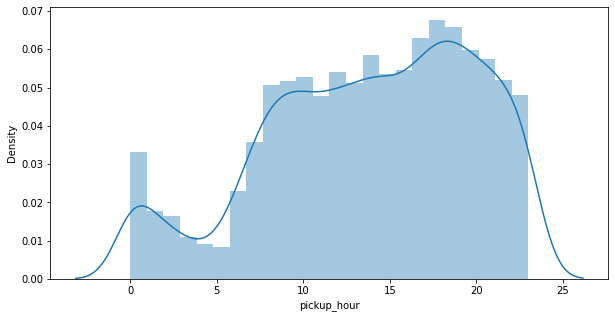

In [ ]:
# 문제 6
# 승차시간 대의 분포를 어림 잡아 보았을 때 0~5시 / 5~10시 / 10~15시 / 15~20시 / 20~24시로 구간화할 수 있어 보입니다.
# time_range라는 변수를 새로 생성하여 구간화 작업을 수행해주세요. ex) pickup_hour가 8시일 경우 -> '5~10시'
plt.figure(figsize = (10,5))
sns.distplot(taxi['pickup_hour'], kde = True, )
plt.show()

In [105]:
taxi.loc[taxi.pickup_hour< 5, 'time_range'] = '0 to 5'
taxi.loc[(taxi.pickup_hour >= 5) & (taxi.pickup_hour < 10), 'time_range'] = '5 to 10'
taxi.loc[(taxi.pickup_hour >= 10) & (taxi.pickup_hour < 15), 'time_range'] = '10 to 15'
taxi.loc[(taxi.pickup_hour >= 15) & (taxi.pickup_hour < 20), 'time_range'] = '15 to 20'
taxi.loc[(taxi.pickup_hour >= 20) & (taxi.pickup_hour < 24), 'time_range'] = '20 to 24'

In [108]:
# 문제 7
# time_range(시간 대) 별 수치형 변수들의 평균과 표준편차를 집계해주세요
taxi.groupby('time_range').agg(['mean', 'std']).reindex(index = ['0 to 5', '5 to 10', '10 to 15', '15 to 20', '20 to 24'])

dropoff_hour           pickup_hour                  gap             \
                   mean       std        mean       std       mean        std   
time_range                                                                      
0 to 5         1.557407  1.415014    1.372222  1.370362  12.429630   9.386597   
5 to 10        7.916826  1.257233    7.675908  1.180841  14.396750  12.700011   
10 to 15      12.299387  1.504627   12.055828  1.433168  15.128834  11.565410   
15 to 20      17.379329  1.448092   17.124134  1.398308  15.310069  13.003967   
20 to 24      20.705224  4.215672   21.406716  1.110524  12.805224   9.192334   

           passengers            distance                 fare             \
                 mean       std      mean       std       mean        std   
time_range                                                                  
0 to 5       1.616667  1.294809  3.527500  3.854266  13.239815  10.793662   
5 to 10      1.500000  1.241815  3.015143  3.743621  12.972285  11.167323   
10 to 15     1.566871  1.254632  2.895908  3.756774  13.162963  11.766842   
15 to 20     1.511987  1.150457  2.994646  4.033449  13.352312  12.203880   
20 to 24     1.543284  1.143377  3.027903  3.657967  12.670478  10.925986   

                 tip               tolls                total             
                mean       std      mean       std       mean        std  
time_range                                                                
0 to 5      2.014889  2.480297  0.188241  1.314517  18.699333  12.946963  
5 to 10     1.830593  2.288580  0.339369  1.406269  17.911750  13.120014  
10 to 15    1.846810  2.355714  0.341583  1.427798  18.132828  13.857821  
15 to 20    2.050448  2.662063  0.373889  1.537310  19.189568  14.905447  
20 to 24    2.142157  2.341575  0.281552  1.256190  18.445007  13.000853

In [ ]:
# 문제 8
# 문제 7의 결과를 보고, 인사이트를 뽑아주세요.
# not coding, just write your answers.


- 20 to 24의 pickup_hour과 dropoff_hour의 차이만 거꾸로 되어있고, 표준편차 또한 비교적 수치가 큰점을 고려했을때 20시 전 pickup 후 20시 직후 택시 dropoff 승객 비율이 높을 가능성이 있다.
- 5 to 10, 15 to 20의 gap column 표준편차가 크다는 지표는 교통체증 구간과 아닌 구간의 차이로 커졌을 가능성이 있다.


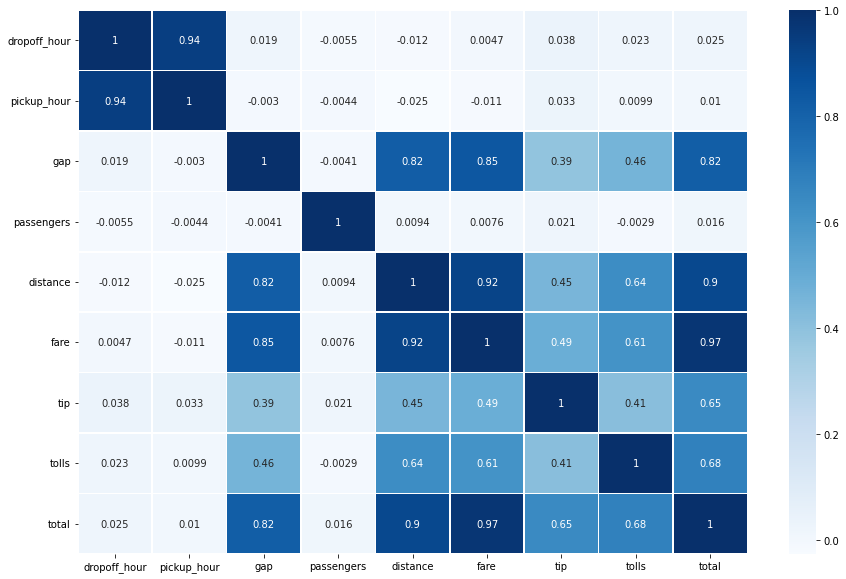

In [ ]:
# 참고
# 수치형 변수들간의 상관관계 히트맵 (선형 관계)
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(taxi.corr(), annot = True, cmap = 'Blues', linewidths = 0.6)
plt.show()